In [72]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [73]:
signal = sio.loadmat('EMG_only_s14.mat')

In [74]:
print(signal["left"].shape)
signal

(68, 358400)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Nov 12 20:28:46 2022',
 '__version__': '1.0',
 '__globals__': [],
 'left': array([[-186856.25 , -186927.75 , -186951.   , ..., -158500.25 ,
         -158470.5  , -158491.75 ],
        [-292595.25 , -293203.   , -293344.75 , ..., -246771.75 ,
         -246718.25 , -246757.25 ],
        [ -12715.996,  -12870.996,  -12999.496, ...,  -19445.496,
          -19250.746,  -19163.246],
        ...,
        [-817651.   , -817499.5  , -817587.75 , ..., -623848.5  ,
         -623918.   , -624214.25 ],
        [-782868.   , -783068.   , -782909.   , ..., -583269.25 ,
         -583265.25 , -583058.75 ],
        [-766947.   , -766631.75 , -766685.   , ..., -627494.5  ,
         -627589.25 , -627328.   ]], dtype=float32),
 'right': array([[-185748.   , -185525.75 , -185612.5  , ..., -154575.25 ,
         -154814.25 , -155262.75 ],
        [-293364.5  , -293026.   , -293155.25 , ..., -245539.25 ,
         -245657.5  , -245592.5  ]

In [75]:
200*68*512*7

48742400

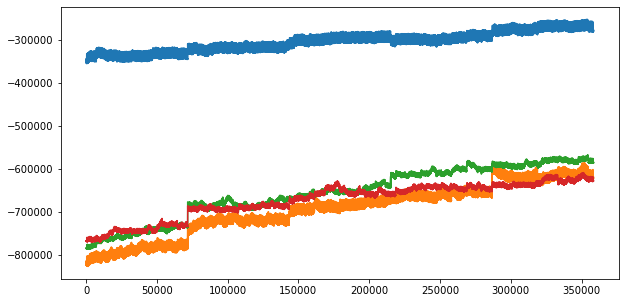

In [76]:
right=signal["right"]
plt.figure(figsize = (10,5))
plot = plt.plot(right[64:68,:].T)

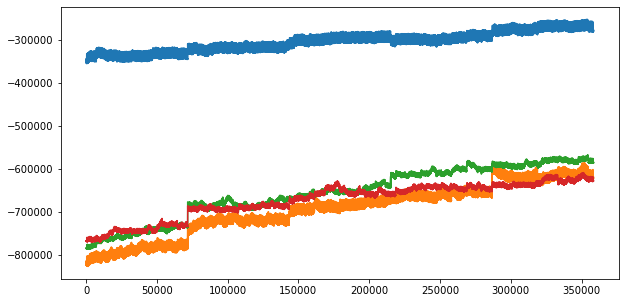

In [77]:
right=signal["right"]
right = right[64:68,:]
right = right.reshape(100,4,512*7)
# right = right[:,64:68,:]
right.shape
plt.figure(figsize = (10,5))
plot = plt.plot(right.reshape((4,512*100*7)).T)

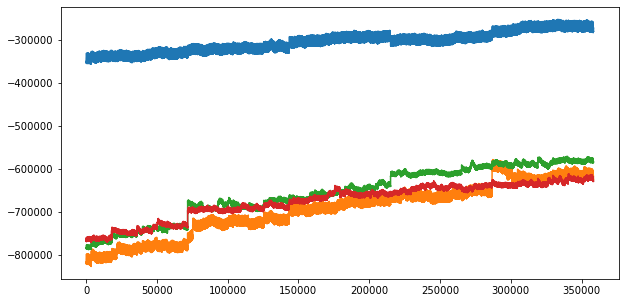

In [78]:
left = signal["left"]
left = left[64:68,:]
left = left.reshape(100,4,512*7)
plt.figure(figsize=(10,5))
plot = plt.plot(left.reshape((4,100*512*7)).T)

In [79]:

run = np.concatenate((left,right),axis=0)
y_right= np.zeros(100);y_left = np.ones(100)# 0 = derecha //// 1 = izquierda
y = np.concatenate((y_left,y_right),axis=0)
left.shape, right.shape, run.shape, y.shape

((100, 4, 3584), (100, 4, 3584), (200, 4, 3584), (200,))

In [80]:
(1,right[1,:,:].shape)

(1, (4, 3584))

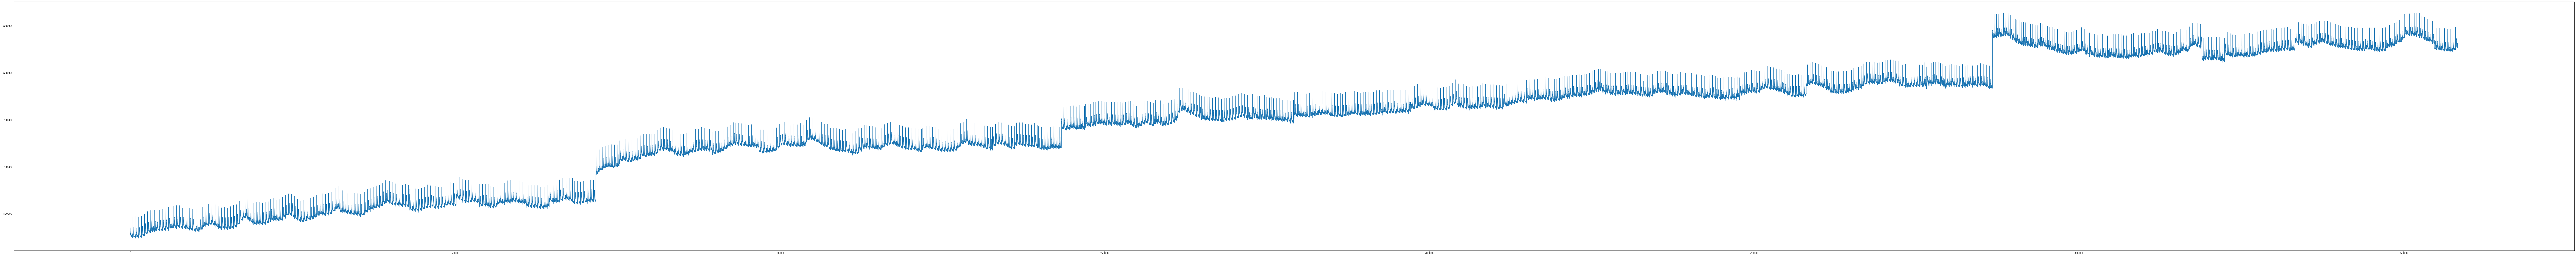

In [81]:
plt.figure(figsize=(200,20))
right_ = right.reshape(4,512*100*7)
plot = plt.plot(right_[1,:])
# plt.figsize(100,220)

# Plotear 2 ensayos distintos

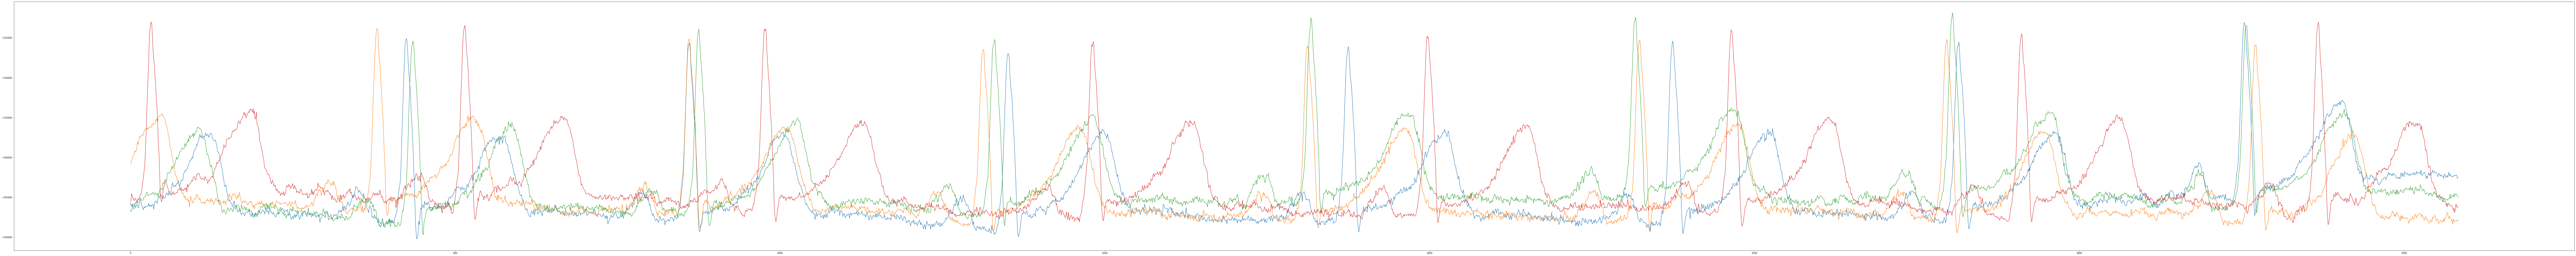

In [82]:
run_ = run.reshape(200,4,512*7)
plt.figure(figsize=(200,20))
plot =plt.plot(run_[1,:,:].T)

In [83]:
plt.figure(figsize=(100,20))
plot = plt.plot(run_.reshape((4,512*7*200)).T)

# Estandarizar

In [84]:
run_[1,:,:].shape
np.arange(9)
x = np.ones((10,40))
x[1,:] = x[1,:]-1
run_[1,:,:].shape

(4, 3584)

In [85]:

def estandarizarCanal(channelArray):#shape (canales x tiempo)
    avg  = np.average(channelArray,axis = 1)
    # print(avg)
    std = np.std(channelArray,axis = 1)
    for i in range(4):  
        channelArray[i,:] = (channelArray[i,:]-avg[i])/std[i]
    # print(avg.shape, std.shape)
    # channelArray = (channelArray-avg)#/std
    #avg = avg.reshape(*avg.shape, 1)
    #avg.shape
    return channelArray

def estandarizarCanales(completeRun):
    for i in range(completeRun.shape[0]):
        completeRun[i,:,:] = estandarizarCanal(completeRun[i,:,:])
    return completeRun

In [86]:
_ = plt.plot(run.reshape((4,512*200*7)).T)


In [87]:

trial = estandarizarCanales(run_)
# plt.figure(figsize = (200,50))
_ = plt.plot(run.reshape((4,512*200*7)).T)
plt.figure(figsize = (50,10))
_ = plt.plot(trial.reshape((4,512*200*7)).T)

In [97]:
train_len = 160
test_len = 40
input_shape = (train_len, 4,512*7,1)
num_classes = 2

In [98]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf

rand_i = np.random.choice(200, 200, replace=False)

x_train = run_[rand_i[0:160]]
y_train = y[rand_i[0:160]]
x_test = run_[rand_i[0:160]]
y_test = y[rand_i[160:200]]
x_test = run_[rand_i[160:200]]

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 4, 3584), (160, 2), (40, 4, 3584), (40, 2))

In [99]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape[1:]),
        layers.Conv2D(32, kernel_size=(4,100), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
     
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

ValueError: Exception encountered when calling layer "max_pooling2d_3" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_3/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,3485,32].

Call arguments received by layer "max_pooling2d_3" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 3485, 32), dtype=float32)

In [ ]:
batch_size = 5
epochs = 150
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Otro modelo

In [ ]:
model2 = True
## Load labelled EMG sessions to train on
# selected = ['esic_82','cise_38','iecs_45']
# x, y = np.empty((0, L, 4), np.float32), np.empty((0, 4), np.float32)
# for k in selected:
#     x = np.append(x,sessions[k][0],axis=0)
#     y = np.append(y,sessions[k][1],axis=0)

### Downsample, shuffle and split (from sklearn.cross_validation)
# x_train, x_val, y_train, y_val = train_test_split((x[:,::ds,:]), y, test_size=0.25)
input_shape = (train_len, 4,512*7)

### Create the network
model2 = keras.Sequential()
model2.add(layers.Conv1D(40, 10, strides=2, padding='same', activation='relu', input_shape=input_shape[1:]))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling1D(3))
model2.add(layers.Conv1D(40, 5, strides=2, padding='same', activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling1D(3))
model2.add(layers.Conv1D(40, 4, strides=1, padding='same', activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling1D(3))
model2.add(layers.GlobalAveragePooling1D())
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(num_classes, activation='softmax'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Train and save results for later plotting
history[ '40 1023 523 413 50 :'+'-'.join(selected)] = model2.fit(x_train, y_train, 
    batch_size=100, epochs=40)

In [ ]:
layers.MaxPooling1D(3).pool_size